### News Mood
In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.

#### The first plot will be and/or feature the following:

Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
Each plot point will reflect the compound sentiment of a tweet.
Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.



Your final Jupyter notebook must:

    Pull last 100 tweets from each outlet.
    Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
    Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
    Export the data in the DataFrame into a CSV file.
    Save PNG images for each plot.

As final considerations:

Use the Matplotlib and Seaborn libraries.
Include a written description of three observable trends based on the data.
Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
Include an exported markdown version of your Notebook called README.md in your GitHub repository.

In [100]:
# Imports
import tweepy
import json
import test_environment
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [101]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [102]:
from test_environment import consumer_key, consumer_secret, access_token, access_token_secret

In [103]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [104]:
# Target User
target_user = ["CNN", "CBS", "BBC", "Fox", "nytimes"]
# target_user = ["CNN"]

In [105]:
analysis = []
for user in target_user:
    # Get 100 tweets from home feed
    public_tweets = api.user_timeline(user, count=100)
    
    tweets = []
    times = []    
    
    for tweet in public_tweets:
        tweet_text = tweet["text"]
        timestamp = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
        tweets.append((tweet_text, timestamp))
        
    for tweet_text, timestamp in tweets:
        results = analyzer.polarity_scores(tweet_text)
        results["tweet"] = tweet_text
        results["time"] = timestamp
        results["source"] = user
        analysis.append(results)


In [106]:
df = pd.DataFrame(analysis)

,compound,neg,neu,pos,source,time,tweet
0,0.0000,0.000,1.000,0.000,CNN,2018-06-04 02:00:12+00:00,Disney embraces $15 minimum wage in negotiatio...
1,0.1027,0.157,0.663,0.181,CNN,2018-06-04 01:45:05+00:00,French Open marathon man Alexander Zverev make...
2,-0.9246,0.489,0.511,0.000,CNN,2018-06-04 01:30:13+00:00,"""Her only weapon was her medical vest."" Palest..."
3,0.0000,0.000,1.000,0.000,CNN,2018-06-04 01:15:12+00:00,Actor Benedict Cumberbatch saves cyclist from ...
4,-0.4588,0.150,0.850,0.000,CNN,2018-06-04 01:00:10+00:00,Former New Jersey Gov. Chris Christie says it'...
5,-0.4939,0.225,0.775,0.000,CNN,2018-06-04 00:45:10+00:00,Nearly 100 women suffered under dancing doctor...
6,0.4939,0.000,0.862,0.138,CNN,2018-06-04 00:30:03+00:00,"When he was a kid, Richard Jenkins raised his ..."
7,-0.8316,0.464,0.536,0.000,CNN,2018-06-04 00:15:07+00:00,Author Germaine Greer's dangerous ideas about ...
8,0.0000,0.000,1.000,0.000,CNN,2018-06-04 00:00:09+00:00,Sen. Bob Corker says GOP senators are working ...
9,0.0000,0.000,1.000,0.000,CNN,2018-06-03 23:45:02+00:00,"President Trump says Senate Democrats are ""res..."


In [107]:
df.sort_values("time")

,compound,neg,neu,pos,source,time,tweet
199,0.8687,0.000,0.605,0.395,CBS,2018-04-16 02:57:41+00:00,The news keeps getting better and better. @Chr...
198,0.0000,0.000,1.000,0.000,CBS,2018-04-16 02:58:55+00:00,"Was that ""A-sharp"" performance by @reba and @k..."
197,0.8268,0.000,0.648,0.352,CBS,2018-04-16 03:00:10+00:00,RT @min_d24: Love how @LukeBryanOnline was str...
196,0.4389,0.000,0.818,0.182,CBS,2018-04-16 03:02:50+00:00,"Put your hands up for Entertainer of the Year,..."
195,0.8392,0.123,0.437,0.440,CBS,2018-04-16 03:06:10+00:00,RT @AmberLee_RN: Anyone else crying from that ...
194,0.5255,0.000,0.841,0.159,CBS,2018-04-16 03:56:42+00:00,The #ACMawards crowd was roaring for Vocal Eve...
193,0.1280,0.100,0.776,0.123,CBS,2018-04-16 05:00:00+00:00,"In case you missed any, here's a rundown of al..."
192,0.6360,0.000,0.682,0.318,CBS,2018-04-16 05:00:00+00:00,Retweet if you think @carrieunderwood looks be...
191,0.0000,0.000,1.000,0.000,CBS,2018-04-16 05:30:00+00:00,"To all of tonight's nominees, we tip our hats ..."
190,0.0000,0.000,1.000,0.000,CBS,2018-04-16 05:55:00+00:00,That's a wrap for the 53rd #ACMawards! 🎬 https...


In [113]:
# target_user = ["CNN", "CBS", "BBC", "Fox", "nytimes"]
cnn = df[df["source"]=="CNN"]
# the above is filtering. if the source is cnn, it will return a true. if true, then keep row.
cbs = df[df["source"]=="CBS"]
bbc = df[df["source"]=="BBC"]
fox = df[df["source"]=="Fox"]
nyt = df[df["source"]=="nytimes"]


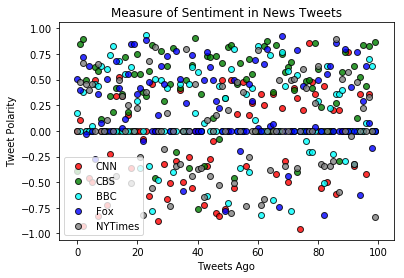

In [115]:
# Plotting the value of the polarity per tweet
plt.scatter(x=range(len(cnn)), y=cnn["compound"], c="red", label="CNN", edgecolors='k',
                  alpha=.8)
plt.scatter(x=range(len(cbs)), y=cbs["compound"], c="green", label="CBS", edgecolors='k',
                  alpha=.8)
plt.scatter(x=range(len(bbc)), y=bbc["compound"], c="cyan", label="BBC", edgecolors='k',
                  alpha=.8)
plt.scatter(x=range(len(fox)), y=fox["compound"], c="blue", label="Fox", edgecolors='k',
                  alpha=.8)
plt.scatter(x=range(len(nyt)), y=nyt["compound"], c="grey", label="NYTimes", edgecolors='k',
                  alpha=.8)

# Set a Title, axis labels, legend
plt.title("Measure of Sentiment in News Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

plt.legend()
plt.savefig('sentiment_scatter.png')

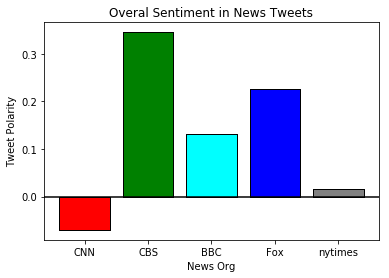

In [116]:
plt.bar(x=cnn["source"], height=cnn["compound"].mean(), color="red", label="CNN", edgecolor="black")
plt.bar(x=cbs["source"], height=cbs["compound"].mean(), color="green", label="CBS", edgecolor="black")
plt.bar(x=bbc["source"], height=bbc["compound"].mean(), color="cyan", label="BBC", edgecolor="black")
plt.bar(x=fox["source"], height=fox["compound"].mean(), color="blue", label="Fox", edgecolor="black")
plt.bar(x=nyt["source"], height=nyt["compound"].mean(), color="grey", label="NYTimes", edgecolor="black")

# Set a Title, axis labels, legend
plt.title("Overal Sentiment in News Tweets")
plt.xlabel("News Org")
plt.ylabel("Tweet Polarity")
plt.axhline(y=0, c="black")

#output image
plt.savefig('sentiment_bar.png')

# Challenge

In [65]:
pd.DataFrame({
    "compound": [],
    "source": [],
    "time": [],
    "tweet": []
})

""


In [114]:
df.to_csv("df_output_sentiment", encoding='utf-8')


### Observations:

- Observation 1: According to the bar chart, over the last 100 tweets, CNN tweeted the most "negative" tweets.
- Observation 2: Overall, the vast majority of the last 100 tweets were surprisingly "positive".
- Observation 3: The scatter plot also seems to support having mostly neutral or positive sentiment in tweets. There are definitely more dots on or above the x-axis.